In [4]:
import cartopy.crs as ccrs
import matplotlib.path as mpath
import matplotlib.pyplot as plt
import numpy as np
import scipy.signal
import xarray as xr

# parameters for setting circular cutoff for Southern Ocean plots
theta = np.linspace(0, 2*np.pi, 100)
center, radius = [0.5, 0.5], 0.5
verts = np.vstack([np.sin(theta), np.cos(theta)]).T
circle = mpath.Path(verts * radius + center)

In [5]:
ds_251 = xr.open_dataset("/work/Katherine.Turner/tempest-extremes/kernel/hist5deg_odiv-251.nc")
ds_251_JJA = xr.open_dataset("/work/Katherine.Turner/tempest-extremes/kernel/hist5deg_odiv-251_JJA.nc")
ds_251_DJF = xr.open_dataset("/work/Katherine.Turner/tempest-extremes/kernel/hist5deg_odiv-251_DJF.nc")

ds_era = xr.open_dataset("/work/Katherine.Turner/tempest-extremes/kernel/hist5deg_ERA5.nc")
ds_era_JJA = xr.open_dataset("/work/Katherine.Turner/tempest-extremes/kernel/hist5deg_ERA5_JJA.nc")
ds_era_DJF = xr.open_dataset("/work/Katherine.Turner/tempest-extremes/kernel/hist5deg_ERA5_DJF.nc")

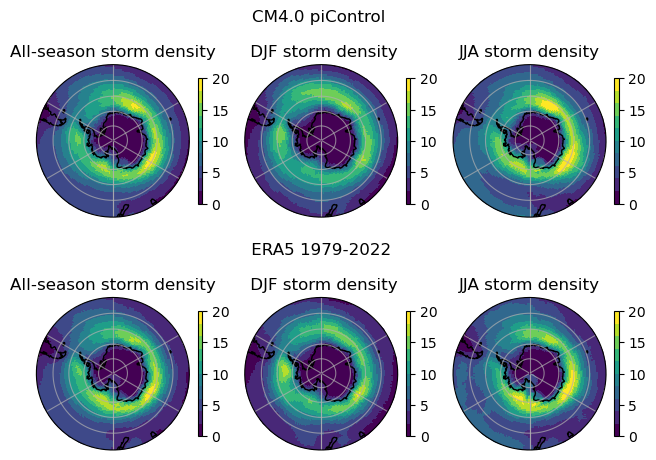

In [11]:
fig, axs = plt.subplots(nrows=2, ncols=3,
                       subplot_kw={'projection': ccrs.SouthPolarStereo()})
axs = axs.flatten()

###################### CM4 HISTOGRAMS ##############################

ds_251.hist_5deg.plot(ax=axs[0], transform=ccrs.PlateCarree(),
                                    cbar_kwargs = {'fraction': 0.03,
                                                    'aspect': 30,
                                                    'shrink': 0.7,
                                                    'label':''},
                                    cmap=plt.get_cmap('viridis', 10),
                                    vmin = 0, vmax=20, extend="neither")
axs[0].set_title("All-season storm density")
ds_251_DJF.hist_5deg.plot(ax=axs[1], transform=ccrs.PlateCarree(),
                                     cbar_kwargs = {'fraction': 0.03,
                                                    'aspect': 30,
                                                    'shrink': 0.7,
                                                    'label':''},
                                    cmap=plt.get_cmap('viridis', 10),
                                    vmin = 0, vmax=20, extend="neither")
axs[1].set_title("CM4.0 piControl \n \n DJF storm density")
ds_251_JJA.hist_5deg.plot(ax=axs[2], transform=ccrs.PlateCarree(),
                                     cbar_kwargs = {'fraction': 0.03,
                                                    'aspect': 30,
                                                    'shrink': 0.7,
                                                    'label':''},
                                    cmap=plt.get_cmap('viridis', 10),
                                    vmin = 0, vmax=20, extend="neither")
axs[2].set_title("JJA storm density")

###################### ERA5 HISTOGRAMS ##############################

ds_era.hist_5deg.plot(ax=axs[3], transform=ccrs.PlateCarree(),
                                    cbar_kwargs = {'fraction': 0.03,
                                                    'aspect': 30,
                                                    'shrink': 0.7,
                                                    'label':''},
                                    cmap=plt.get_cmap('viridis', 10),
                                    vmin = 0, vmax=20, extend="neither")
axs[3].set_title("All-season storm density")
ds_era_DJF.hist_5deg.plot(ax=axs[4], transform=ccrs.PlateCarree(),
                                     cbar_kwargs = {'fraction': 0.03,
                                                    'aspect': 30,
                                                    'shrink': 0.7,
                                                    'label':''},
                                    cmap=plt.get_cmap('viridis', 10),
                                    vmin = 0, vmax=20, extend="neither")
axs[4].set_title("\n ERA5 1979-2022 \n \n DJF storm density")
ds_era_JJA.hist_5deg.plot(ax=axs[5], transform=ccrs.PlateCarree(),
                                     cbar_kwargs = {'fraction': 0.03,
                                                    'aspect': 30,
                                                    'shrink': 0.7,
                                                    'label':''},
                                    cmap=plt.get_cmap('viridis', 10),
                                    vmin = 0, vmax=20, extend="neither")
axs[5].set_title("JJA storm density")

for i in np.arange(6):
    axs[i].set_extent([-180, 180, -90, -40], ccrs.PlateCarree())
    axs[i].gridlines(alpha=0.7)
    axs[i].set_boundary(circle, transform=axs[i].transAxes)
    axs[i].coastlines()
    
plt.tight_layout()
plt.savefig("/work/Katherine.Turner/CM4_storms/analysis_figures/CM4_stormtracks_TE.png", format="png", dpi=100, bbox_inches="tight")